In [67]:
import pandas as pd
import tensorflow as tf

In [68]:
import numpy as np


In [69]:
import matplotlib.pyplot as plt

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
import os

In [72]:
import cv2

In [73]:
img_path = "C:/Users/Simge/Downloads/spectrograms/"

In [74]:
folder_list = ['0','1','2','3','4','5','6','7','8','9']

In [75]:
classes = ["air_conditioner","car_horn","children_playing","dog_bark","drilling","engine_idling",
           "gun_shot","jackhammer","siren","street_music"]

In [76]:
# creating list format image,class
img_files_list=[]

for folder in folder_list:
    for img_file in os.listdir(img_path+folder):
        image=img_path+folder+"/"+img_file
        img_files_list.append([image,classes[int(folder)]])
        
df=pd.DataFrame(img_files_list,columns=["img","label"])

# Create a dataframe for mapping label
df_labels = {
    'air_conditioner' : 0,
    'car_horn' : 1,
    'children_playing' : 2,
    'dog_bark' : 3,
    'drilling': 4,
    'engine_idling':5,
    'gun_shot':6,
    'jackhammer':7,
    'siren':8,
    'street_music':9,
    
}

# Encode
df['label_code'] = df['label'].map(df_labels)

In [77]:
df['label'].value_counts()

air_conditioner     1000
children_playing    1000
dog_bark            1000
drilling            1000
engine_idling       1000
jackhammer          1000
street_music        1000
siren                929
car_horn             429
gun_shot             374
Name: label, dtype: int64

In [78]:
print(df.shape)

(8732, 3)


In [79]:
df.head()

,img,label,label_code
0,C:/Users/Simge/Downloads/spectrograms/0/100852...,air_conditioner,0
1,C:/Users/Simge/Downloads/spectrograms/0/100852...,air_conditioner,0
2,C:/Users/Simge/Downloads/spectrograms/0/100852...,air_conditioner,0
3,C:/Users/Simge/Downloads/spectrograms/0/100852...,air_conditioner,0
4,C:/Users/Simge/Downloads/spectrograms/0/100852...,air_conditioner,0


In [81]:
# Prepare a model training dataset
# we need to use opencv
X = []

dim = (37, 37)
for img in df["img"]:
    
    # plt.imread is used to read an image from a file into an array
    #grayscaling
    img=cv2.imread(str(img),cv2.IMREAD_GRAYSCALE)
    
    # resizing
    img = cv2.resize(img, dim)
    
    # normalization
    img = img / 255
    X.append(img)

y = df["label_code"]

#Train/Validation/Test split
#80-10-10
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)



X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

X_train = X_train.reshape(-1,37,37,1)
X_test = X_test.reshape(-1,37,37,1)
X_val = X_val.reshape(-1,37,37,1)
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_val = y_val.reshape(-1,)


#Use tf.keras.Sequential() to create a model object
model = tf.keras.Sequential()


model.add(tf.keras.layers.Conv2D(32,
                       kernel_size=(3,3),
                       strides=(1,1),
                       padding="same",
                       activation="relu",
                       input_shape=(37,37,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                        kernel_size=(3,3),
                       strides=(1,1),
                       padding="same",
                       activation="relu",))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,
                       kernel_size=(3,3),
                       strides=(1,1),
                       padding="same",
                       activation="relu",))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
X_train=tf.stack(X_train)
y_train=tf.stack(y_train)
X_val=tf.stack(X_val)
y_val=tf.stack(y_val)
results=model.fit(X_train,y_train,
                 batch_size=128,
                 epochs=50,validation_data=(X_val,y_val))

(6549, 37, 37)
(1637, 37, 37)
(546, 37, 37)
(6549,)
(1637,)
(546,)
Epoch 1/50
52/52 [==============================] - 7s 108ms/step - loss: 2.1441 - accuracy: 0.1990 - val_loss: 1.8234 - val_accuracy: 0.3700
Epoch 2/50
52/52 [==============================] - 6s 109ms/step - loss: 1.8430 - accuracy: 0.3181 - val_loss: 1.4733 - val_accuracy: 0.4652
Epoch 3/50
52/52 [==============================] - 6s 111ms/step - loss: 1.6330 - accuracy: 0.4077 - val_loss: 1.3127 - val_accuracy: 0.5238
Epoch 4/50
52/52 [==============================] - 6s 113ms/step - loss: 1.4941 - accuracy: 0.4680 - val_loss: 1.2225 - val_accuracy: 0.6300
Epoch 5/50
52/52 [==============================] - 6s 115ms/step - loss: 1.3726 - accuracy: 0.5143 - val_loss: 1.1169 - val_accuracy: 0.6593
Epoch 6/50
52/52 [==============================] - 6s 113ms/step - loss: 1.2980 - accuracy: 0.5476 - val_loss: 1.0653 - val_accuracy: 0.6465
Epoch 7/50
52/52 [==============================] - 6s 117ms/step - loss: 1.2122 

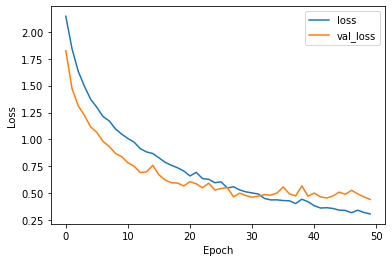

In [82]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

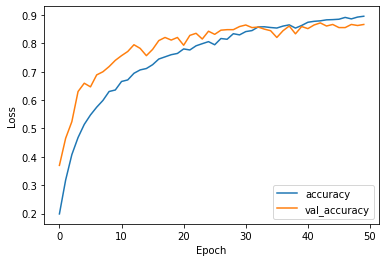

In [83]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [84]:
X_test=tf.stack(X_test)
y_test=tf.stack(y_test)
model.evaluate(X_test,y_test)

52/52 [==============================] - 1s 11ms/step - loss: 0.5177 - accuracy: 0.8595


[0.51772540807724, 0.8594990968704224]